Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns

Função que trata e muda para float32 o PREÇO

In [2]:
def arruma(preco:str) -> np.float32:
    preco = preco.strip().replace('R$','',1)
    preco = preco.replace('.', '_')
    preco = preco.replace(',', '.')
    preco = preco.replace('_', '')
    return np.float32(preco)


DataSet aplicando função de correção no Preço

In [3]:
sconverter = {
    'PREÇO': arruma
}
    
data = pd.read_csv('resultado_parcial.csv', converters = sconverter)
data

,MARCA,MODELO,SISTEMA_OP,REDE,MEMORIA_INT,RAM,RESOL CAM TRAS,GARANTIA,PESO,PREÇO
0,Motorola,MOTO G 52,Android,4G,NaN,NaN,NaN,12.0,420.0,1089.000000
1,Samsung,Galaxy A54,Android,5G,128.0,8.0,50.0,12.0,332.0,1859.000000
2,Samsung,Galaxy A14,Android,5G,128.0,8.0,50.0,12.0,410.0,1129.000000
3,Samsung,Galaxy A54,Android,5G,128.0,8.0,50.0,12.0,334.0,1859.000000
4,Samsung,Galaxy A04e,Android,4G,64.0,4.0,13.0,12.0,284.0,759.000000
...,...,...,...,...,...,...,...,...,...,...
426,Apple,iPhone 13,IOS,5G,256.0,6.0,12.0,12.0,1000.0,7547.000000
427,Samsung,Galaxy S22+,Android,5G,128.0,8.0,50.0,12.0,413.0,4949.100098
428,Realme,C55,Android,4G,32.0,2.0,8.0,3.0,190.0,1299.900024
429,Positivo,Twist 3 Pro,Android,4G,64.0,NaN,NaN,12.0,500.0,493.369995


Deep Info do DataSet

In [4]:
data.info(memory_usage= 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MARCA           429 non-null    object 
 1   MODELO          423 non-null    object 
 2   SISTEMA_OP      431 non-null    object 
 3   REDE            431 non-null    object 
 4   MEMORIA_INT     424 non-null    float64
 5   RAM             390 non-null    float64
 6   RESOL CAM TRAS  373 non-null    float64
 7   GARANTIA        399 non-null    float64
 8   PESO            429 non-null    float64
 9   PREÇO           431 non-null    float32
dtypes: float32(1), float64(5), object(4)
memory usage: 125.5 KB


Quantos valores nulos temos no DataSet

In [5]:
data.isna().sum()

MARCA              2
MODELO             8
SISTEMA_OP         0
REDE               0
MEMORIA_INT        7
RAM               41
RESOL CAM TRAS    58
GARANTIA          32
PESO               2
PREÇO              0
dtype: int64

Histograma da Resolução de Câmera Traseira


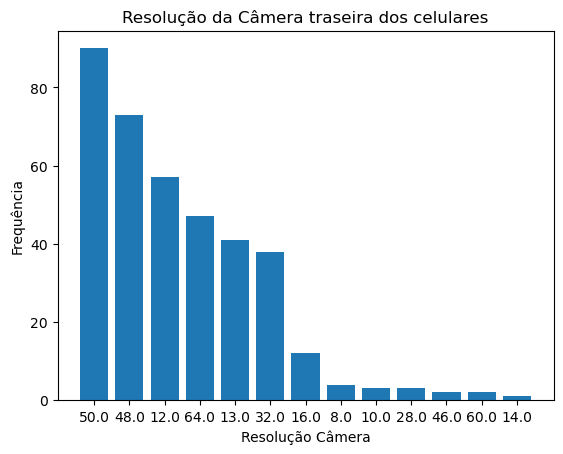

Float64Index([50.0, 48.0, 12.0, 64.0, 13.0, 32.0, 16.0, 8.0, 10.0, 28.0, 46.0,
              60.0, 14.0],
             dtype='float64')

In [6]:
contagem_resolcam = data['RESOL CAM TRAS'].value_counts()
# Entende como categórica
indices = contagem_resolcam.index.astype(str)
plt.bar(indices, contagem_resolcam)

plt.xlabel('Resolução Câmera')
plt.ylabel('Frequência')
plt.title('Resolução da Câmera traseira dos celulares')
plt.show()
data['RESOL CAM TRAS']
contagem_resolcam.index

TOP 10 Marcas mais frequentes no DataSet


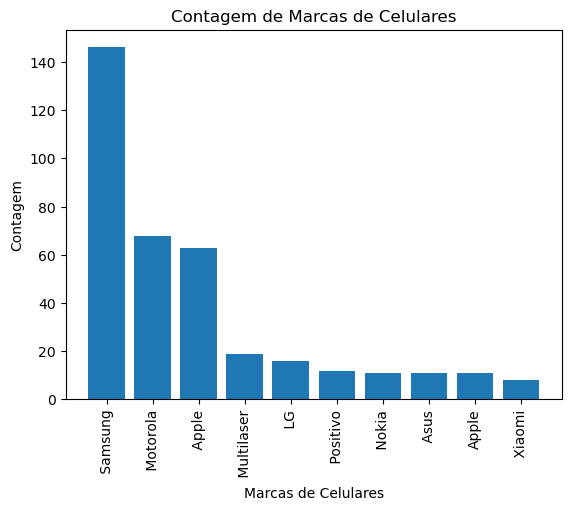

In [7]:
data['MARCA'] = data['MARCA'].str.replace(r'\s+', ' ', regex=True)

contagem_marcas = data['MARCA'].value_counts()

top_marcas = contagem_marcas.head(10)

plt.bar(top_marcas.index, top_marcas.values)
plt.xlabel('Marcas de Celulares')
plt.ylabel('Contagem')
plt.title('Contagem de Marcas de Celulares')
plt.xticks(rotation=90)
plt.show()


Gráfico de pizza dos tipos de Redes

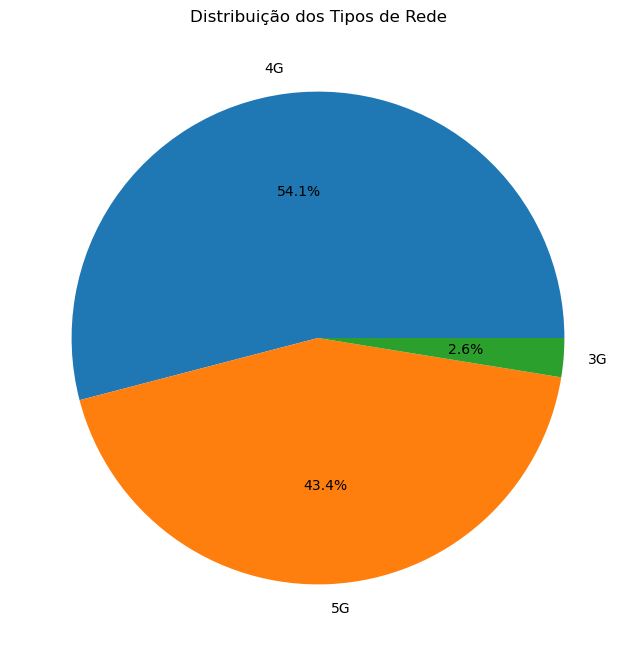

In [8]:
# Contar a frequência de cada tipo de rede
rede_counts = data['REDE'].value_counts()

# Plotar o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(rede_counts, labels=rede_counts.index, autopct='%1.1f%%')
plt.title('Distribuição dos Tipos de Rede')
plt.show()

BoxPlot dos Pesos dos celulares (mediana)

/usr/lib/python3/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


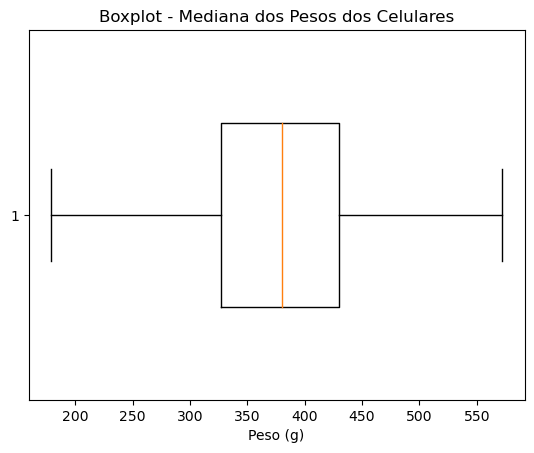

In [9]:
# Remover valores nulos, se houver
data = data.dropna(subset=['PESO'])

# Converter os valores de peso para tipo numérico
data.loc[:, 'PESO'] = pd.to_numeric(data['PESO'])

# Criar o boxplot da mediana dos pesos
plt.boxplot(data['PESO'], vert=False, showfliers=False, widths=0.5)

# Definir título e rótulo do eixo x 
plt.title('Boxplot - Mediana dos Pesos dos Celulares')
plt.xlabel('Peso (g)')

# Exibir o gráfico
plt.show()

QQ PLOT da Memória RAM


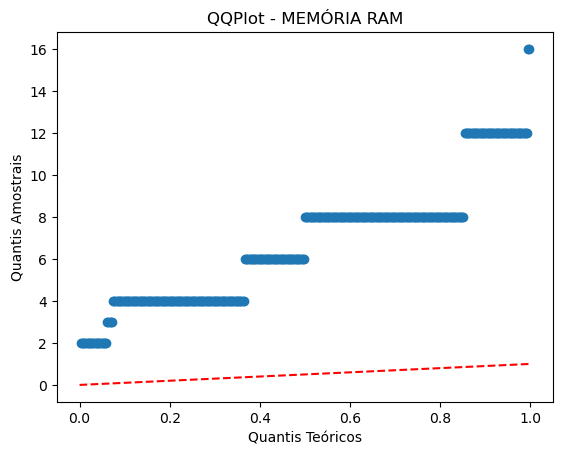

In [10]:
feature = data['RAM']

# Remover valores nulos, se houver
feature = feature.dropna()

# Ordenar os valores da feature em ordem crescente
sorted_data = np.sort(feature)

# Calcular os quantis teóricos esperados da distribuição normal
n = len(sorted_data)
quantis_teóricos = np.arange(1, n + 1) / (n + 1)

# Calcular os quantis amostrais da feature
quantis_amostrais = (np.arange(1, n + 1) - 0.5) / n

# Gerar o gráfico QQPlot
plt.plot(quantis_teóricos, sorted_data, marker='o', linestyle='None')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Linha de referência para uma distribuição normal


plt.title('QQPlot - MEMÓRIA RAM')
plt.xlabel('Quantis Teóricos')
plt.ylabel('Quantis Amostrais')

plt.show()

Distribuição da Memória Interna.

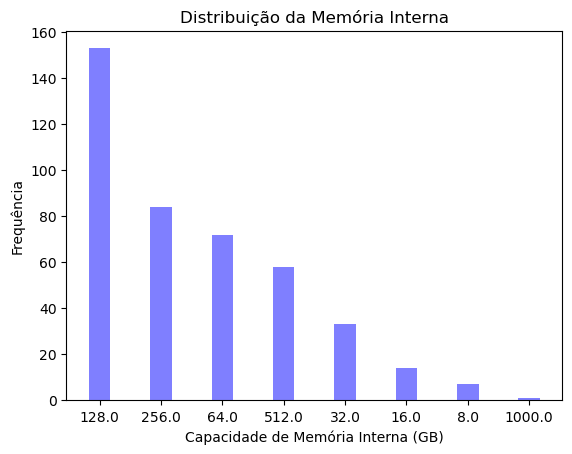

In [11]:
memoria_int = data['MEMORIA_INT']

possiveis_memorias = [8, 16, 32, 64, 128, 256, 512, 1000]

# Filtrar os valores que não correspondem às possíveis capacidades
memoria_int = memoria_int[memoria_int.isin(possiveis_memorias)]

# Calcular a contagem de cada capacidade de memória interna
contagem = memoria_int.value_counts()

# Ordenar as capacidades de memória interna e suas contagens
valores = contagem.index.tolist()
frequencia = contagem.values.tolist()

largura = 0.35

# Definir a posição dos grupos no eixo x
posicao = range(len(valores))

# Gerar o gráfico de barras agrupadas
plt.bar(posicao, frequencia, width=largura, color='blue', alpha=0.5)

# Definir os rótulos do eixo x com as capacidades de memória interna
plt.xticks(posicao, valores)


plt.title('Distribuição da Memória Interna')
plt.xlabel('Capacidade de Memória Interna (GB)')
plt.ylabel('Frequência')

plt.show()


Medidas Tendência Central e de Variabilidade dos Preços

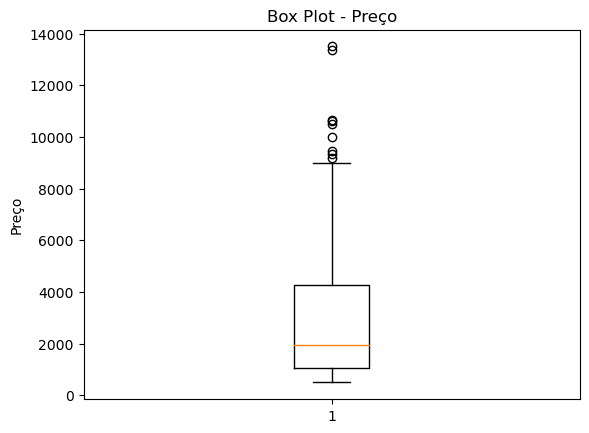

Média: R$ 2909.02
Mediana: R$ 1944.44
Desvio Padrão: R$ 2464.54
Variância: R$ 6073955.5
Mínimo: R$ 493.37
Máximo: R$ 13499.0


count      410.000000
mean      2909.016113
std       2467.550537
min        493.369995
25%       1071.524994
50%       1944.434998
75%       4255.992676
max      13499.000000
Name: PREÇO, dtype: float64

In [12]:
# Selecionar a feature 'Preço'
preco = data['PREÇO']

""" # Limpar os valores da coluna 'Preço'
preco = preco.str.replace(r'R\$', '', regex = True)  # Remover o prefixo 'R$'
preco = preco.str.replace('.', '', regex = True)  # Remover os pontos de separação de milhares
preco = preco.str.replace(',', '.', regex = True)  # Substituir a vírgula pelo ponto como separador decimal

# Converter os valores para float
preco = preco.astype(float) """

# Filtrar valores dentro da faixa correta
preco = preco[(preco >= 493) & (preco <= 13499)]


# Calcular as medidas de variabilidade
media = np.mean(preco)
mediana = np.median(preco)
desvio_padrao = np.std(preco)
variancia = np.var(preco)
minimo = np.min(preco)
maximo = np.max(preco)

# Plotar box plot
plt.boxplot(preco)
plt.title('Box Plot - Preço')
plt.ylabel('Preço')
plt.show()

# Imprimir as medidas de variabilidade
print("Média: R$", round(media, 2))
print("Mediana: R$", round(mediana, 2))
print("Desvio Padrão: R$", round(desvio_padrao, 2))
print("Variância: R$", round(variancia, 2))

print("Mínimo: R$", round(minimo, 2))
print("Máximo: R$", round(maximo, 2))

preco.describe()

Mapa de Calor que representa a Correlação entre algumas Features

<AxesSubplot:>

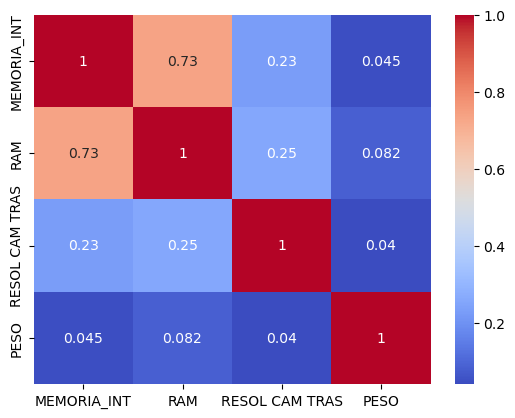

In [13]:
data = pd.read_csv('resultado_parcial.csv')

cols = ['MEMORIA_INT', 'RAM', 'RESOL CAM TRAS', 'PESO', 'PREÇO']

correlation_matrix = data[cols].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')    

Teste de Normaliade dos Preços + Gráfico de densidade

A distribuição não é normal.


<AxesSubplot:xlabel='PREÇO', ylabel='Density'>

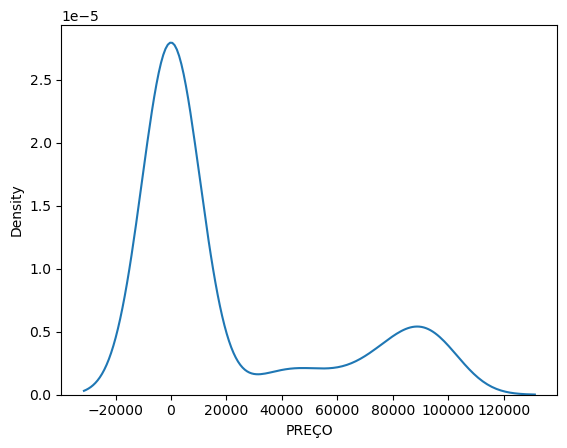

In [14]:

from scipy.stats import normaltest

# Carregar o dataset
data = pd.read_csv('resultado_parcial.csv')

# Extrair apenas os valores numéricos da coluna de preços
data['PREÇO'] = data['PREÇO'].apply(lambda x: re.sub(r'[^\d.]', '', x)).astype('float32')

# Selecionar a coluna de preços
precos = data['PREÇO']

# Teste de normalidade (Teste de D'Agostino-Pearson)
stat, p_value = normaltest(precos)

# Verificar a normalidade
alpha = 0.05
if p_value > alpha:
    print("A distribuição é aproximadamente normal.")
else:
    print("A distribuição não é normal.")

# Plotar gráfico de densidade
sns.kdeplot(precos)




Best Fit Distribution -> Preços

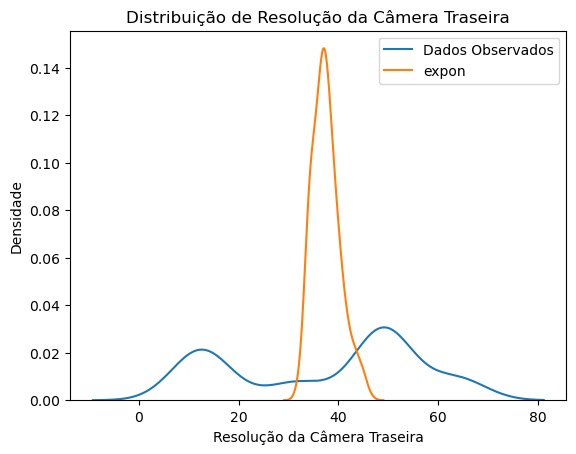

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, lognorm, expon, gamma


data = pd.read_csv('resultado_parcial.csv')

resolucao = data['RESOL CAM TRAS']

# Remover valores nulos ou faltantes (NaN)
resolucao = resolucao.dropna()

# Lista das distribuições a serem avaliadas
distributions = [norm, lognorm, expon, gamma]

# Criação de um DataFrame para armazenar os resultados
results = pd.DataFrame(columns=['Distribution', 'Parameters', 'KS Statistic', 'p-value'])

# Loop sobre as distribuições
for dist in distributions:
    # Ajuste da distribuição aos dados
    params = dist.fit(resolucao)
    
    # Geração de valores da distribuição ajustada
    fitted_data = dist(*params).rvs(size=len(resolucao))
    
    # Cálculo do valor-p do teste de Kolmogorov-Smirnov
    ks_stat, p_value = stats.kstest(resolucao, dist.name, args=params)
    
    # Armazenamento dos resultados no DataFrame
    results = results.append({'Distribution': dist.name, 'Parameters': params,
                              'KS Statistic': ks_stat, 'p-value': p_value}, ignore_index=True)

# Ordenação dos resultados pelo valor-p, iremos pegar a que tem o menor valor-p
results = results.sort_values('p-value')

# Seleciona a melhor distribuição (a que apresenta o menor valor-p)
best_dist = results.iloc[0]['Distribution']
best_params = results.iloc[0]['Parameters']

# Plotagem do gráfico de densidade dos dados e da distribuição ajustada
sns.kdeplot(resolucao, label='Dados Observados')
sns.kdeplot(dist(*best_params).rvs(size=len(resolucao)), label=best_dist)

# Configurações do gráfico
plt.xlabel('Resolução da Câmera Traseira')
plt.ylabel('Densidade')
plt.title('Distribuição de Resolução da Câmera Traseira')
plt.legend()
plt.show()

# A curva 'expon' no gráfico de densidade indica como a distribuição exponencial se ajusta aos dados
# observados da resolução da câmera traseira.
